# Identificação dos membros do Grupo
José Dias

Marcelo Fernando Rauber - magcid@gmail.com

Nancy

# Problema e Dados envolvidos

Nesta atividade, pretende-se auxiliar proprietarios de imóveis a determinar o valor adequado de aluguel de seu imóvel. Não o valor total, mas sim uma estmativa do valor a a ser remetido ao proprietario do imóvel.


O Objetivo é a estimativa do valor de alguel efetivo a ser recebido por proprietários de imóveis em cidades Brasileiras baseando-se da na base de dados disponibilizados em https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent?select=houses_to_rent_v2.csv

Variáveis
    Existem 13 atributos em cada caso do conjunto de dados. Eles são:

    city - Nome da cidade

    area - tamanho em M2 do imóvel

    rooms - quantidade de quartos 

    bathroom - quantidade de banheiros

    parking spaces - vagas de garagem 

    floor - andar em que está o imóvel

    animal - se aceita animais de estimação

    furniture - Móveis planejados
    
    hoa (R$) - Valor do condomíneo

    rent amount (R$) -  Valor do aluguel 

    property tax (R$) - IPTU

    fire insurance (R$) - Seguro contra incêncio

    total (R$) - soma das taxas anteriores

      

A avaliação dos modelos será realizada usando Erro médio absoluto MAE (mean absolute error), conforme determinado pelo especialista da área consultado.

# Visualização do conjunto de dados (análise exploratória básica)



In [ ]:
#importações comuns e configurações
import pandas as pd
import numpy as np

seed = 1211
np.random.seed(seed)

#descritor_dados
#Caso não tenha feito ainda, pode ser necessário baixar a base de dados do link acima e fazer upload para o Colab...
dados = pd.read_csv("/content/houses_to_rent_v2.csv")
dados.head()



,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
#checking the shape
dados.shape

(10692, 13)

In [ ]:
#Procurando valores nulos
dados.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [ ]:
dados.info()
#não há campos nulos... todos numéricos... descrição está no inicio...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


city, floor, animal e furniture são objetos, vamos analisá-los e tratá-los na próxima seção.

In [ ]:
dados['city'].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

As cidades podem ser consideradas como categorias, bastará criar uma matriz esparsa para elas. Será feito na próxima seção.

In [ ]:
dados['floor'].unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

tem um campo com '-', necessário remover. Pela documentação da base de dados indica que é casa. Então podemos assumir como zero. Será feito na próxima seção.

In [ ]:
dados['animal'].unique()

array(['acept', 'not acept'], dtype=object)

Tranquilo, somente se aceita ou não. Será tratado feito na próxima seção.

In [ ]:
dados['furniture'].unique()

array(['furnished', 'not furnished'], dtype=object)

Tranquilo, planejado ou não. Será tratado na próxima seção.

In [ ]:
dados.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


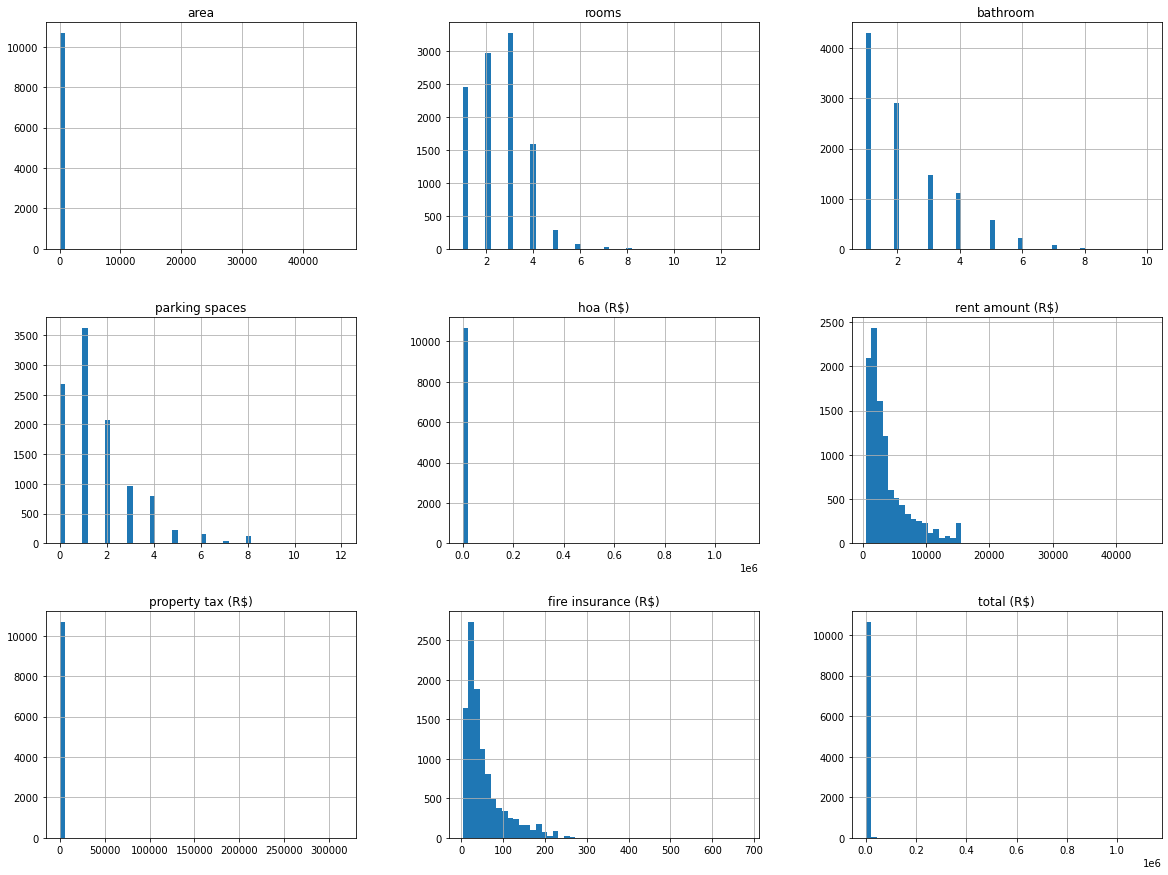

In [ ]:
#apresentar dados em gráficos
%matplotlib inline
import matplotlib.pyplot as plt
dados.hist(bins=50, figsize=(20,15))
plt.show()

Area, HOA, property tax e total parecem ter valores outlayer... o que fazer? Ver com o professor...

# Preparação do conjunto de dados

In [ ]:
# Gerando matriz esparsa do campo city - categorias 
matrizEsparsaCidades = pd.get_dummies(dados.city, prefix='cidade')
matrizEsparsaCidades.sample(n=5, random_state=seed)

,cidade_Belo Horizonte,cidade_Campinas,cidade_Porto Alegre,cidade_Rio de Janeiro,cidade_São Paulo
3555,0,0,0,1,0
2461,0,0,0,0,1
5085,1,0,0,0,0
1174,0,0,0,1,0
9651,0,0,0,1,0


In [ ]:
#Junta os dados com a matriz esparsa
dadosPreparados = pd.concat([dados, matrizEsparsaCidades], axis=1) 
dadosPreparados.sample(n=5, random_state=seed)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),cidade_Belo Horizonte,cidade_Campinas,cidade_Porto Alegre,cidade_Rio de Janeiro,cidade_São Paulo
3555,Rio de Janeiro,70,2,2,2,3,acept,not furnished,900,1700,265,22,2887,0,0,0,1,0
2461,São Paulo,60,1,2,1,2,acept,not furnished,1155,4000,112,51,5318,0,0,0,0,1
5085,Belo Horizonte,260,3,2,4,-,acept,not furnished,0,2600,268,43,2911,1,0,0,0,0
1174,Rio de Janeiro,30,1,1,0,8,acept,not furnished,456,900,94,12,1462,0,0,0,1,0
9651,Rio de Janeiro,65,1,1,0,1,acept,not furnished,350,1800,30,24,2204,0,0,0,1,0


In [ ]:
# Deleta a coluna original do campo city
dadosPreparados.drop(['city'], axis=1, inplace=True)

In [ ]:
dadosPreparados.sample(n=5, random_state=seed)

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),cidade_Belo Horizonte,cidade_Campinas,cidade_Porto Alegre,cidade_Rio de Janeiro,cidade_São Paulo
3555,70,2,2,2,3,acept,not furnished,900,1700,265,22,2887,0,0,0,1,0
2461,60,1,2,1,2,acept,not furnished,1155,4000,112,51,5318,0,0,0,0,1
5085,260,3,2,4,-,acept,not furnished,0,2600,268,43,2911,1,0,0,0,0
1174,30,1,1,0,8,acept,not furnished,456,900,94,12,1462,0,0,0,1,0
9651,65,1,1,0,1,acept,not furnished,350,1800,30,24,2204,0,0,0,1,0


In [ ]:
#Transformando os campos textuais de sim e não
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dadosPreparados['animal']=le.fit_transform(dadosPreparados['animal'])
dadosPreparados['furniture']=le.fit_transform(dadosPreparados['furniture'])
dadosPreparados.sample(n=5, random_state=seed)

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),cidade_Belo Horizonte,cidade_Campinas,cidade_Porto Alegre,cidade_Rio de Janeiro,cidade_São Paulo
3555,70,2,2,2,3,0,1,900,1700,265,22,2887,0,0,0,1,0
2461,60,1,2,1,2,0,1,1155,4000,112,51,5318,0,0,0,0,1
5085,260,3,2,4,-,0,1,0,2600,268,43,2911,1,0,0,0,0
1174,30,1,1,0,8,0,1,456,900,94,12,1462,0,0,0,1,0
9651,65,1,1,0,1,0,1,350,1800,30,24,2204,0,0,0,1,0


In [ ]:
#Floor
dadosPreparados.loc[dadosPreparados['floor'] == '-', 'floor'] = 0
dadosPreparados['floor'] = dadosPreparados['floor'].astype('int64')
dadosPreparados.sample(n=5, random_state=seed)


,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),cidade_Belo Horizonte,cidade_Campinas,cidade_Porto Alegre,cidade_Rio de Janeiro,cidade_São Paulo
3555,70,2,2,2,3,0,1,900,1700,265,22,2887,0,0,0,1,0
2461,60,1,2,1,2,0,1,1155,4000,112,51,5318,0,0,0,0,1
5085,260,3,2,4,0,0,1,0,2600,268,43,2911,1,0,0,0,0
1174,30,1,1,0,8,0,1,456,900,94,12,1462,0,0,0,1,0
9651,65,1,1,0,1,0,1,350,1800,30,24,2204,0,0,0,1,0


In [ ]:
dadosPreparados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   area                   10692 non-null  int64
 1   rooms                  10692 non-null  int64
 2   bathroom               10692 non-null  int64
 3   parking spaces         10692 non-null  int64
 4   floor                  10692 non-null  int64
 5   animal                 10692 non-null  int64
 6   furniture              10692 non-null  int64
 7   hoa (R$)               10692 non-null  int64
 8   rent amount (R$)       10692 non-null  int64
 9   property tax (R$)      10692 non-null  int64
 10  fire insurance (R$)    10692 non-null  int64
 11  total (R$)             10692 non-null  int64
 12  cidade_Belo Horizonte  10692 non-null  uint8
 13  cidade_Campinas        10692 non-null  uint8
 14  cidade_Porto Alegre    10692 non-null  uint8
 15  cidade_Rio de Janeiro  10692 non-nul

# Seleção/Análise das Features
Criarei vários conjuntos de dados.
Depois passarei a avaliar cada um...

In [ ]:
#Análise da Variância
dadosPreparados.var()

area                     2.883872e+05
rooms                    1.371865e+00
bathroom                 1.980207e+00
parking spaces           2.526576e+00
floor                    3.683337e+01
animal                   1.728557e-01
furniture                1.843448e-01
hoa (R$)                 2.431200e+08
rent amount (R$)         1.161818e+07
property tax (R$)        9.658622e+06
fire insurance (R$)      2.281785e+03
total (R$)               2.717462e+08
cidade_Belo Horizonte    1.038244e-01
cidade_Campinas          7.342141e-02
cidade_Porto Alegre      9.913821e-02
cidade_Rio de Janeiro    1.206886e-01
cidade_São Paulo         2.474629e-01
dtype: float64

In [ ]:
#Features com variância próximas a zero não interferem.
#Há uma variáncia alta. Ver com professor se mantemos todos as Features.

#dadosFeatuers1 = dadosPreparados.drop(columns=['animal', 'floor'])
dadosFeatuers1 = dadosPreparados
dadosFeatuers1.sample(n=10)

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),cidade_Belo Horizonte,cidade_Campinas,cidade_Porto Alegre,cidade_Rio de Janeiro,cidade_São Paulo
3555,70,2,2,2,3,0,1,900,1700,265,22,2887,0,0,0,1,0
2461,60,1,2,1,2,0,1,1155,4000,112,51,5318,0,0,0,0,1
5085,260,3,2,4,0,0,1,0,2600,268,43,2911,1,0,0,0,0
1174,30,1,1,0,8,0,1,456,900,94,12,1462,0,0,0,1,0
9651,65,1,1,0,1,0,1,350,1800,30,24,2204,0,0,0,1,0
2168,240,3,3,4,6,0,0,2600,5500,1834,70,10000,0,0,0,0,1
8882,80,3,2,1,5,0,1,1150,1450,0,19,2619,0,0,0,1,0
6497,58,2,2,1,12,1,0,928,4000,256,51,5235,0,0,0,0,1
2224,38,1,1,0,1,1,1,60,950,0,13,1023,0,0,0,0,1
2494,44,1,1,0,1,0,0,360,1600,0,21,1981,0,0,0,1,0


<function matplotlib.pyplot.show>

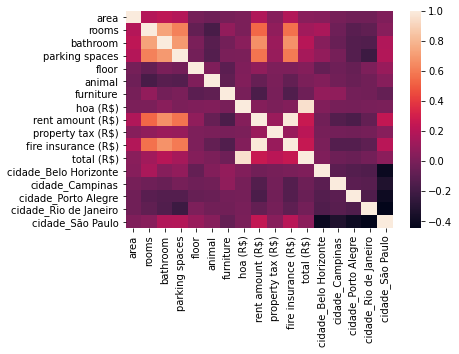

In [ ]:
#Análise da Correlação

#O esperado é uma correlação alta. O que tiver correlação baixa pode ser excluído. Tipicamente correlações superiores a 0.8 (em módulo) ?

#Visualizando graficamente
import seaborn as sn
import matplotlib.pyplot as plt2
sn.heatmap(dadosFeatuers1.corr())
plt2.show

Forte correlação entre:
- valor total e condomíneo (HOA) 
- seguro contra incencio e valor do aluguel

In [ ]:
#Análise da Correlação das Features com o objetivo, neste caso é o valor do aluguel e o total
corr = abs(dadosFeatuers1.corr()["total (R$)"])
corr.sort_values(axis=0)

animal                   0.007143
cidade_Belo Horizonte    0.018271
cidade_Rio de Janeiro    0.021545
floor                    0.036431
furniture                0.037781
cidade_Campinas          0.041391
area                     0.051799
cidade_Porto Alegre      0.053763
cidade_São Paulo         0.059786
rooms                    0.134597
parking spaces           0.148684
bathroom                 0.208339
property tax (R$)        0.218344
fire insurance (R$)      0.254911
rent amount (R$)         0.264490
hoa (R$)                 0.955024
total (R$)               1.000000
Name: total (R$), dtype: float64

Ficaria apenas:  Condominio - hoa (R$) com  0.955024

In [ ]:
corr2 = abs(dadosFeatuers1.corr()["rent amount (R$)"])
corr2.sort_values(axis=0)

cidade_Belo Horizonte    0.024869
hoa (R$)                 0.036490
animal                   0.067754
floor                    0.073596
cidade_Rio de Janeiro    0.078650
property tax (R$)        0.107884
cidade_Campinas          0.132342
cidade_Porto Alegre      0.162051
furniture                0.164235
area                     0.180742
cidade_São Paulo         0.245690
total (R$)               0.264490
rooms                    0.541758
parking spaces           0.578361
bathroom                 0.668504
fire insurance (R$)      0.987343
rent amount (R$)         1.000000
Name: rent amount (R$), dtype: float64

Ficariam apenas:
rooms                    0.541758
parking spaces           0.578361
bathroom                 0.668504
fire insurance (R$)      0.987343

In [ ]:
#O que tiver correlação baixa pode ser excluído. Neste caso estou assumindo como ponto de corte 0,5
#estou assumindo também que iremos determinar o valor do aluguel, e não o valor total.
print ("Features a serem excluídas")
#i is index 
#v is value
dadosFeatuers2 = dadosFeatuers1;
for i, v in corr2.items():
  if v<0.5:
     dadosFeatuers2 = dadosFeatuers2.drop(columns=i)
     print("Excluído: ",  i , v)
           
print ("fim das Features excluídas")
print ()
print ('Amostra das Features atuais')
dadosFeatuers2.sample(n=10)

Features a serem excluídas
Excluído:  area 0.18074233055311728
Excluído:  floor 0.0735962792056551
Excluído:  animal 0.06775419578955871
Excluído:  furniture 0.16423511170411303
Excluído:  hoa (R$) 0.03648965091996407
Excluído:  property tax (R$) 0.10788421644741146
Excluído:  total (R$) 0.26448961897349027
Excluído:  cidade_Belo Horizonte 0.02486879181961598
Excluído:  cidade_Campinas 0.13234168769121668
Excluído:  cidade_Porto Alegre 0.1620512820733806
Excluído:  cidade_Rio de Janeiro 0.07864994281804268
Excluído:  cidade_São Paulo 0.24568984799388024
fim das Features excluídas

Amostra das Features atuais


,rooms,bathroom,parking spaces,rent amount (R$),fire insurance (R$)
7440,2,2,1,1950,26
164,1,1,1,2529,39
3459,2,1,0,1030,17
6594,3,2,3,5100,75
1850,1,1,1,800,12
6233,2,4,0,3000,39
7639,1,1,1,825,11
4897,3,3,3,3500,53
1134,3,2,2,2600,33
6127,3,3,3,5740,87


# Separação do conjunto em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split
#Features2
dadosTreinamento_F2, dadosTeste_F2 = train_test_split(dadosFeatuers2, test_size=0.2, random_state=seed)
#Features1 - No primeiro momento ficou igual aos dados preparados, pois nada foi excluído
dadosTreinamento_F1, dadosTeste_F1 = train_test_split(dadosFeatuers1, test_size=0.2, random_state=seed)
#Features Originais, preparados 
dadosTreinamento_Ori, dadosTeste_Ori = train_test_split(dadosPreparados, test_size=0.2, random_state=seed)


# Treinando os modelos

Comparando alguns modelos de machine learning e algumas configuração de hiperparâmetros, justificando a escola do melhor modelo.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# Métrica a ser usada: Erro médio absoluto MAE (mean absolute error), definida pelo especialista
from sklearn.metrics import mean_absolute_error, mean_squared_error
#Também R2, Nesse caso, expressa a quantidade da variância dos dados que é explicada pelo modelo linear. Assim, quanto maior o R², mais explicativo é o modelo linear, ou seja, melhor ele se ajusta à amostra. Por exemplo, um R² = 0,8234 significa que o modelo linear explica 82,34% da variância da variável dependente a partir do regressores (variáveis independentes) incluídas naquele modelo linear. 
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_predict
from math import sqrt

cross_validation = KFold (n_splits=10, shuffle=True, random_state=seed) #aqui fiquei em dúvida, pelo que li na documentação, usando o kfold não seria necessário separar o DataSet em Treino e teste, ele mesmo faz isso. Mas já que eu separei vou anter aqui...
avaliacaoModelos = [] 


In [ ]:
avaliacaoModelos = []
# MODELO: Regressão Linear
from sklearn.linear_model import LinearRegression
modelo = "Regressão Linear"
pipeline = make_pipeline (StandardScaler(), LinearRegression())

#Treinando e avaliando Feature 2
origem = "Features 2"
X = dadosTreinamento_F2.drop(columns="rent amount (R$)")
y = dadosTreinamento_F2["rent amount (R$)"]
predicao_y = cross_val_predict (pipeline, X, y, cv=cross_validation)
MAE = round((mean_absolute_error(y,predicao_y)),3)
RMSE = round(sqrt(mean_squared_error(y,predicao_y)),3)
R2 = round(r2_score(y,predicao_y)*100,2)
avaliacaoModelos.append([modelo, origem, MAE, RMSE, R2])


#Treinando e avaliando Feature 1
# origem = "Features 1"
# X = dadosTreinamento_F1.drop(columns="rent amount (R$)")
# y = dadosTreinamento_F1["rent amount (R$)"]
# predicao_y = cross_val_predict (pipeline, X, y, cv=cross_validation)
# MAE = round((mean_absolute_error(y,predicao_y)),3)
# RMSE = round(sqrt(mean_squared_error(y,predicao_y)),3)
# R2 = round(r2_score(y,predicao_y)*100,2)
# avaliacaoModelos.append([modelo, origem, MAE, RMSE, R2])

#Treinando e avaliando Todas as Features 
origem = "Todas as Features"
X = dadosTreinamento_Ori.drop(columns="rent amount (R$)")
y = dadosTreinamento_Ori["rent amount (R$)"]
predicao_y = cross_val_predict (pipeline, X, y, cv=cross_validation)
MAE = round((mean_absolute_error(y,predicao_y)),3)
RMSE = round(sqrt(mean_squared_error(y,predicao_y)),3)
R2 = round(r2_score(y,predicao_y)*100,2)
avaliacaoModelos.append([modelo, origem, MAE, RMSE, R2])


In [ ]:
# MODELO: KNeighborsRegressor
from sklearn import neighbors
modelo = "KNeighborsRegressor"
pipeline = make_pipeline (StandardScaler(), neighbors.KNeighborsRegressor(n_neighbors=10))

#Treinando e avaliando Feature 2
origem = "Features 2"
X = dadosTreinamento_F2.drop(columns="rent amount (R$)")
y = dadosTreinamento_F2["rent amount (R$)"]
predicao_y = cross_val_predict (pipeline, X, y, cv=cross_validation)
MAE = round((mean_absolute_error(y,predicao_y)),3)
RMSE = round(sqrt(mean_squared_error(y,predicao_y)),3)
R2 = round(r2_score(y,predicao_y)*100,2)
avaliacaoModelos.append([modelo, origem, MAE, RMSE, R2])


#Treinando e avaliando Feature 1
# origem = "Features 1)"
# X = dadosTreinamento_F1.drop(columns="rent amount (R$)")
# y = dadosTreinamento_F1["rent amount (R$)"]
# predicao_y = cross_val_predict (pipeline, X, y, cv=cross_validation)
# MAE = round((mean_absolute_error(y,predicao_y)),3)
# RMSE = round(sqrt(mean_squared_error(y,predicao_y)),3)
# R2 = round(r2_score(y,predicao_y)*100,2)
# avaliacaoModelos.append([modelo, origem, MAE, RMSE, R2])

#Treinando e avaliando Todas as Features 
origem = "Todas as Features"
X = dadosTreinamento_Ori.drop(columns="rent amount (R$)")
y = dadosTreinamento_Ori["rent amount (R$)"]
predicao_y = cross_val_predict (pipeline, X, y, cv=cross_validation)
MAE = round((mean_absolute_error(y,predicao_y)),3)
RMSE = round(sqrt(mean_squared_error(y,predicao_y)),3)
R2 = round(r2_score(y,predicao_y)*100,2)
avaliacaoModelos.append([modelo, origem, MAE, RMSE, R2])


In [ ]:
# MODELO: 
from sklearn.ensemble import RandomForestRegressor
modelo = "RandomForestRegressor"
pipeline = make_pipeline (StandardScaler(), RandomForestRegressor(n_estimators=10, random_state=seed))

#Treinando e avaliando Feature 2
origem = "Features 2"
X = dadosTreinamento_F2.drop(columns="rent amount (R$)")
y = dadosTreinamento_F2["rent amount (R$)"]
predicao_y = cross_val_predict (pipeline, X, y, cv=cross_validation)
MAE = round((mean_absolute_error(y,predicao_y)),3)
RMSE = round(sqrt(mean_squared_error(y,predicao_y)),3)
R2 = round(r2_score(y,predicao_y)*100,2)
avaliacaoModelos.append([modelo, origem, MAE, RMSE, R2])


# #Treinando e avaliando Feature 1
# origem = "Features 1"
# X = dadosTreinamento_F1.drop(columns="rent amount (R$)")
# y = dadosTreinamento_F1["rent amount (R$)"]
# predicao_y = cross_val_predict (pipeline, X, y, cv=cross_validation)
# MAE = round((mean_absolute_error(y,predicao_y)),3)
# RMSE = round(sqrt(mean_squared_error(y,predicao_y)),3)
# R2 = round(r2_score(y,predicao_y)*100,2)
# avaliacaoModelos.append([modelo, origem, MAE, RMSE, R2])

#Treinando e avaliando Todas as Features 
origem = "Todas as Features"
X = dadosTreinamento_Ori.drop(columns="rent amount (R$)")
y = dadosTreinamento_Ori["rent amount (R$)"]
predicao_y = cross_val_predict (pipeline, X, y, cv=cross_validation)
MAE = round((mean_absolute_error(y,predicao_y)),3)
RMSE = round(sqrt(mean_squared_error(y,predicao_y)),3)
R2 = round(r2_score(y,predicao_y)*100,2)
avaliacaoModelos.append([modelo, origem, MAE, RMSE, R2])


In [ ]:
# MODELO: 
from sklearn.tree import DecisionTreeRegressor
modelo = "DecisionTreeRegressor"
pipeline = make_pipeline (StandardScaler(), DecisionTreeRegressor() )

#Treinando e avaliando Feature 2
origem = "Features 2"
X = dadosTreinamento_F2.drop(columns="rent amount (R$)")
y = dadosTreinamento_F2["rent amount (R$)"]
predicao_y = cross_val_predict (pipeline, X, y, cv=cross_validation)
MAE = round((mean_absolute_error(y,predicao_y)),3)
RMSE = round(sqrt(mean_squared_error(y,predicao_y)),3)
R2 = round(r2_score(y,predicao_y)*100,2)
avaliacaoModelos.append([modelo, origem, MAE, RMSE, R2])


# #Treinando e avaliando Feature 1
# origem = "Features 1"
# X = dadosTreinamento_F1.drop(columns="rent amount (R$)")
# y = dadosTreinamento_F1["rent amount (R$)"]
# predicao_y = cross_val_predict (pipeline, X, y, cv=cross_validation)
# MAE = round((mean_absolute_error(y,predicao_y)),3)
# RMSE = round(sqrt(mean_squared_error(y,predicao_y)),3)
# R2 = round(r2_score(y,predicao_y)*100,2)
# avaliacaoModelos.append([modelo, origem, MAE, RMSE, R2])

#Treinando e avaliando Todas as Features 
origem = "Todas as Features"
X = dadosTreinamento_Ori.drop(columns="rent amount (R$)")
y = dadosTreinamento_Ori["rent amount (R$)"]
predicao_y = cross_val_predict (pipeline, X, y, cv=cross_validation)
MAE = round((mean_absolute_error(y,predicao_y)),3)
RMSE = round(sqrt(mean_squared_error(y,predicao_y)),3)
R2 = round(r2_score(y,predicao_y)*100,2)
avaliacaoModelos.append([modelo, origem, MAE, RMSE, R2])


In [ ]:
df_res = pd.DataFrame(avaliacaoModelos, columns=["Modelo ML", "Features", "MAE", "RMSE", "R2"]) #Armazena o resultado dos testes preliminares
print ("========================================")
print("Segundo o especialista, o melhor parametro de avaliação é o MAE (Erro Médio Absoluto)")
print("Então o melhor modelo está no topo da lista (segundo uma análise preliminar)")
print ("========================================")
df_res.sort_values(by=['MAE', 'R2'])

Segundo o especialista, o melhor parametro de avaliação é o MAE (Erro Médio Absoluto)
Então o melhor modelo está no topo da lista (segundo uma análise preliminar)


,Modelo ML,Features,MAE,RMSE,R2
1,Regressão Linear,Todas as Features,0.728,6.820,100.00
7,DecisionTreeRegressor,Todas as Features,68.033,360.761,98.91
5,RandomForestRegressor,Todas as Features,68.298,345.342,99.00
4,RandomForestRegressor,Features 2,232.074,535.394,97.59
6,DecisionTreeRegressor,Features 2,242.524,612.020,96.86
2,KNeighborsRegressor,Features 2,323.319,646.985,96.49
0,Regressão Linear,Features 2,341.743,542.505,97.53
3,KNeighborsRegressor,Todas as Features,519.687,888.909,93.37


O melhor resultado foi: 

Regressão Linear com Todas as Features 	
MAE 0.728 	RMSE 6.820 	R2 100.00

# Ajustando o modelo


In [ ]:
#demora, mas menos de 1 minuto
from sklearn.model_selection import GridSearchCV

param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
X = dadosTreinamento_Ori.drop(columns="rent amount (R$)")
y = dadosTreinamento_Ori["rent amount (R$)"]
linear_reg = LinearRegression( )


grid_search = GridSearchCV(linear_reg, param_grid, cv=5,
                           scoring='neg_mean_absolute_error',
                           return_train_score=True)

grid_search.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=0)

In [ ]:
grid_search.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

# Teste Final

Fazer teste final para obter um erro aproximado, neste caso, MAE.
{'copy_X': True, 'fit_intercept': True, 'normalize': False}



In [ ]:
pipelinefinal = make_pipeline (StandardScaler(), LinearRegression(fit_intercept=True, copy_X=True, normalize=False))

#Treinando e avaliando
origem = "Todas as Features"
X = dadosTeste_Ori.drop(columns="rent amount (R$)")
y = dadosTeste_Ori["rent amount (R$)"]
predicao_y = cross_val_predict (pipelinefinal, X, y, cv=cross_validation)
MAE = round((mean_absolute_error(y,predicao_y)),3)
RMSE = round(sqrt(mean_squared_error(y,predicao_y)),3)
R2 = round(r2_score(y,predicao_y)*100,2)
print("Melhor modelo: Regressão Linear")
print('  MAE,   RMSE,  R2')
print([MAE, RMSE, R2])

Melhor modelo: Regressão Linear
  MAE,   RMSE,  R2
[0.404, 1.027, 100.0]
